# Parameters in DBSCAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import sys
sys.path.append('../../fonts')
from set_font import set_font

## Part 1: Generate the Dataset

In [2]:
np.random.seed(1337)
data = datasets.make_circles(n_samples=500, noise=0.1, factor=0.4)[0]

## Part 2: Calculate the Distances $d_i$

In [3]:
n_min = 4
nbrs = NearestNeighbors(n_neighbors=n_min, metric='euclidean').fit(data)
distances, _ = nbrs.kneighbors(data)
k_dists = distances[:, -1]
epsilon = 0.15

## Part 3: Visualize the Result

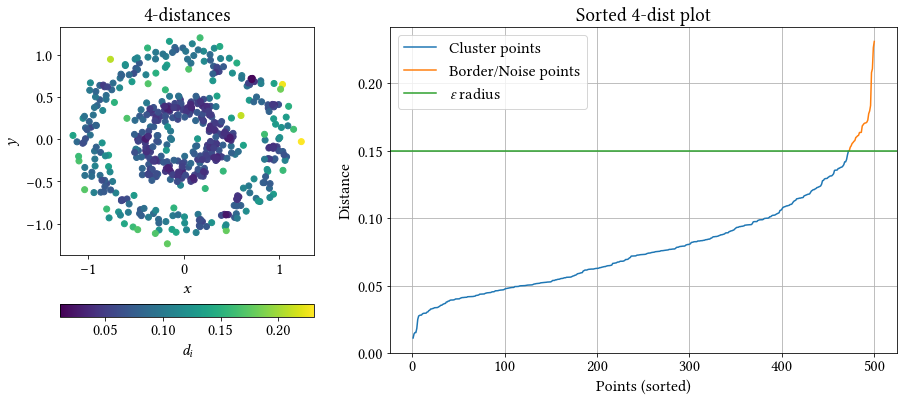

In [4]:
set_font()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 2]})

plt_k_dists = ax1.scatter(data[:, 0], data[:, 1], c=k_dists)
fig.colorbar(plt_k_dists, ax=ax1, orientation='horizontal', pad=0.15, label='$d_i$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('%d-distances' % n_min)

point_numbers = np.arange(1, len(data) + 1)
k_dists_sorted = np.sort(k_dists)
ax2.plot(point_numbers, np.ma.masked_where(k_dists_sorted > epsilon, k_dists_sorted), label='Cluster points')
ax2.plot(point_numbers, np.ma.masked_where(k_dists_sorted <= epsilon, k_dists_sorted), label='Border/Noise points')
ax2.axhline(epsilon, c='C2', label=r'$\varepsilon$ radius')
ax2.set_xlabel('Points (sorted)')
ax2.set_ylabel('Distance')
ax2.set_title('Sorted %d-dist plot' % n_min)
ax2.set_axisbelow(True)
ax2.grid()
ax2.legend();
#fig.savefig('../assignment05/figures/DBSCANParameters_DistancePlots.pdf', bbox_inches='tight')

- In the left plot, we see that points which are a bit isolated have a higher distance. These are border or noise points.
- The orange line in the right plot marks border or noise points. A point becomes a border point when it is covered by the expansion process of another cluster, i.e. when it is in the neighbourhood of another core point.

## Part 4: Clustering Result

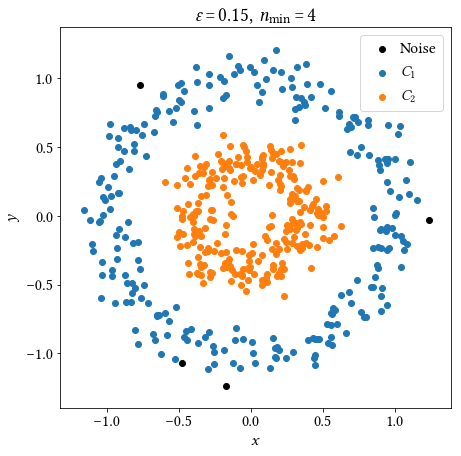

In [5]:
clustering = DBSCAN(eps=epsilon, min_samples=n_min).fit(data)
labels = clustering.labels_

plt.figure(figsize=(7, 7))
for label in np.unique(labels):
    data_cluster = data[labels == label, :]
    color = 'k' if label == -1 else None
    
    if label == -1:
        name = 'Noise'
    else:
        name = '$C_{%d}$' % (label + 1)
    
    plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=color, label=name)

plt.margins(0.06)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$\varepsilon = %0.2f, \, n_{\mathrm{min}} = %d$' % (epsilon, n_min))
plt.legend(handletextpad=0.1);
#plt.savefig('../assignment05/figures/DBSCANParameters_ClusteringResult.pdf', bbox_inches='tight')

In [6]:
sol_vars = ['k_dists', 'labels']